# <center>OpenCV的Python调用简介</center>

By [青衣极客 Blue Geek](https://mp.weixin.qq.com/s/k1FteTFHOX_iVWuoYH0hLg)

In 2020-01-20

爱好图像处理或者从事计算机视觉方面研究的朋友大概无人不知OpenCV的大名。OpenCV的核心是C/C++程序，因此有比较好的执行效率，不过C/C++的开发效率确实不敢恭维。幸运的是，OpenCV提供了python接口，可以使用开发效率更高的python方式调用OpenCV的强大功能，这种优势互补确实令人鼓舞。对于研究人员和原型产品开发者，使用OpenCV的python调用能够更快地验证idea的可行性和粗略的性能。

## 1. OpenCV的安装

想要在python中调用OpenCV需要准备两个组件，一是OpenCV的核心程序库，二是OpenCV的python接口模块。核心程序为C/C++程序，在不同的操作系统下安装方式稍有差异。

### (1) Windows平台

OpenCV的官网发布了Windows平台下的二进制核心开发程序库，直接下载二进制的安装包即可安装到本地计算机中。只是在核心开发程序库部署完成之后，需要将对应的bin目录添加到PATH环境变量中。OpenCV是完全开源的，但是在Windows平台下不建议使用源码的方式安装。喜欢折腾的朋友可以选择对应的Visual Studio编译试试，这里就不细说。

### (2) Mac平台

在MacOS下安装OpenCV是非常容易的，按照以下两步操作即可完成。第一步安装brew，已经安装过的跳过本步骤。

In [ ]:
ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"

第二步，执行以下指令安装OpenCV。

In [ ]:
brew install opencv

执行完以上两个步骤之后就成功在本机安装了OpenCV，可以到“/usr/local/Cellar”目录下查看是否存在“opencv”的目录。

### (3) Linux平台

在Linux操作系统中(这里以Ubuntu为例)，建议使用源码安装。不过OpenCV依赖一些第三方程序库需要手动安装以下。

In [ ]:
sudo apt install build-essential cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev
sudo apt install libtbb2 libtbb-dev libjpeg-dev libpng-dev libtiff-dev libjasper-dev libdc1394-22-dev

依赖项安装完毕之后就可以从源码开始安装了，源码可以从官网或者github直接下载。在源码的根目录下执行以下代码

In [ ]:
# 创建编译产出的存放目录
mkdir build
cd build
# 生成Makefile
cmake -D CMAKE_BUILD_TYPE=Release -D CMAKE_INSTALL_PREFIX=/usr/local .. 
# 多线程编译
make -j7
# 安装到系统目录下
sudo make install

如果编译过程没有什么问题的话，OpenCV就安装完成了。

### (4) 安装python接口

建议使用pip指令安装，运行以下指令即可

In [ ]:
pip3 install opencv-python

如果提示权限不足，需要在开头加上“sudo”。

到此OpenCV的核心程序库和python调用模块就安装完毕。

## 2. 两个需注意的坑

OpenCV是为图像处理和计算机视觉开发的，因此对于图像大小的描述采用了专业的“宽x高”的方式，而不是numpy数据的“行x列”的方式；OpenCV的默认颜色通道是“BGR”而不是matplotlib中的“RGB”。这两个坑常常导致一些诡异的现象。下面就详细说说这两点。

### (1) 图像颜色通道

我们从图片文件读取图像数据，然后使用matplotlib可视化。

<IPython.core.display.Javascript object>


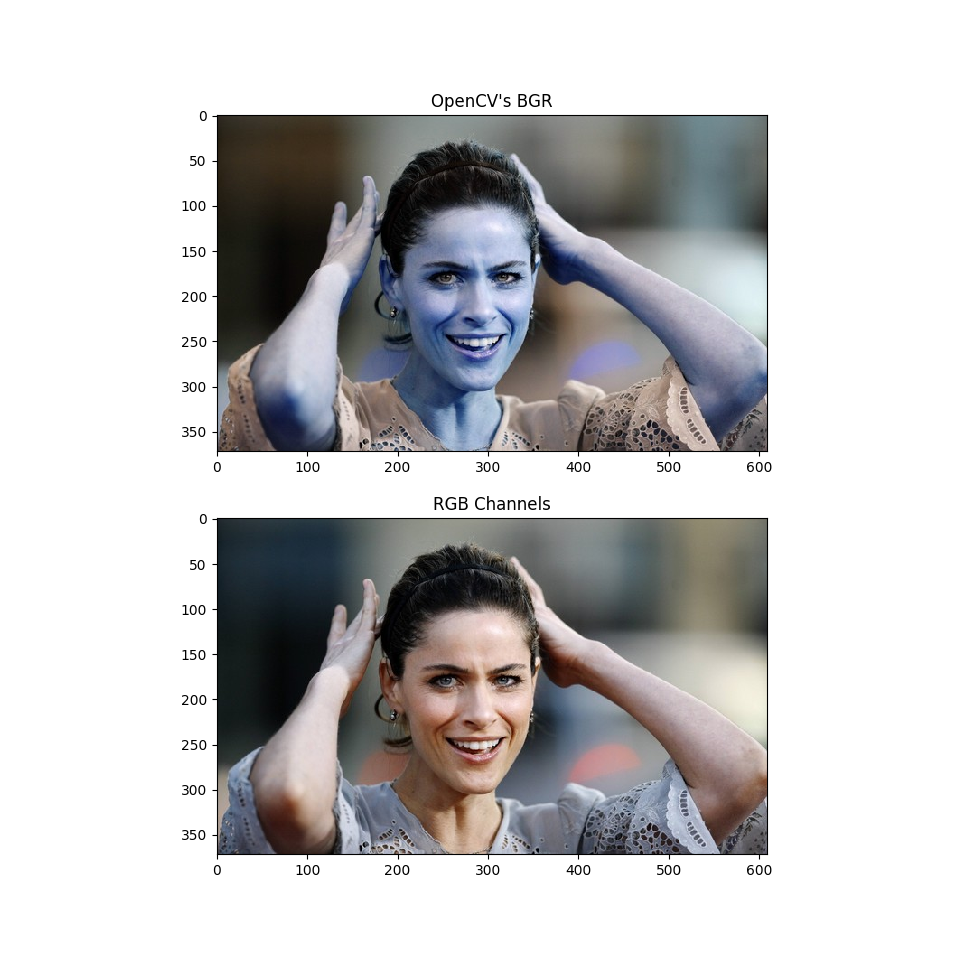

In [5]:
import cv2
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
# 读取图像文件
img = cv2.imread('../data/bg63/image_0008.png')
# 创建画布，并设置画布大小
plt.figure(figsize=(9.6, 9.6))
# 使用matplotlib显示BGR通道图像
plt.subplot(2,1,1)
plt.imshow(img)
plt.title("OpenCV's BGR")
# 使用matplotlib显示RGB通道图像
plt.subplot(2,1,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('RGB Channels')
# 保存图像到文件
plt.savefig('../output/bg63/color.png', dpi=300, bbox_inches='tight')

从显示的图像来看，BGR通道直接可视化的结果是整个画面偏蓝色，而使用cvtColor函数将图像通道调整为RGB后可视化的结果就是正常的。事实上，在OpenCV的所有处理程序中，对这三色通道的默认排列顺序都是BGR。所以，使用其他方式读入的图像通道直接是RGB，如果需要传给OpenCV的程序处理，那么就需要使用cvtColor函数将RGB转换成BGR才能正确运行。这一点对于很多刚开始使用OpenCV的python调用的朋友都是一个巨大的坑。在实际开发中，如果实在不清楚当前图像数据的通道，可以使用matplotlib可视化检查，也可以使用OpenCV内置的imshow检查，不过需要谨记，OpenCV的imshow显示正常的图像表明通道为BGR。

### (2) 图像大小

我们可以使用resize这个函数来实验一下OpenCV中对于图像大小的表示方式。

<IPython.core.display.Javascript object>


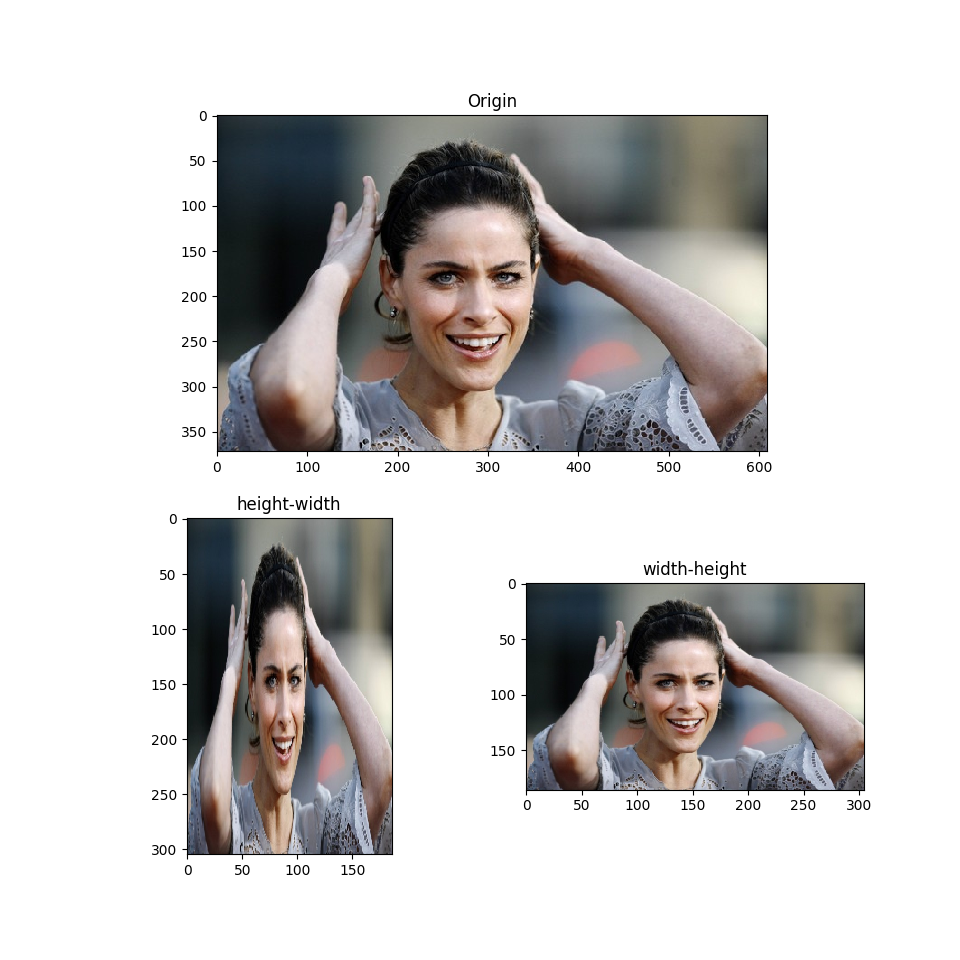

In [7]:
# 创建图像并指定画布大小
plt.figure(figsize=(9.6, 9.6))
# 绘制原始图像
plt.subplot(2,1,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Origin')
# 绘制错误的size格式结果
plt.subplot(2,2,3)
resize_1 = cv2.resize(img, (img.shape[0]//2, img.shape[1]//2))
plt.imshow(cv2.cvtColor(resize_1, cv2.COLOR_BGR2RGB))
plt.title('height-width')
# 绘制正确的size格式结果
plt.subplot(2,2,4)
resize_2 = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2))
plt.imshow(cv2.cvtColor(resize_2, cv2.COLOR_BGR2RGB))
plt.title('width-height')
# 保存图像到文件
plt.savefig('../output/bg63/resize.png', dpi=300, bbox_inches='tight')

从以上的结果可以看出，在给resize传递目标图像大小的时候，必须遵守(宽，高)的格式，否则处理结果就不符合预期。事实上，在OpenCV中其他的图像处理操作的默认设置也是这样的。因此在调用OpenCV中的函数时需要记住这一点。

## 3. 简单例程

或许对OpenCV不太熟悉的朋友还不知道能够使用OpenCV做什么有意思的事情，这里就是用OpenCV的python接口完成一个人脸检测的任务。在OpenCV的安装目录下的“share/opencv4/haarcascades”目录中存储了一些检测器的模型，其中由一个模型“haarcascade_frontalface_default.xml”就是用来完成人脸检测任务的。

<IPython.core.display.Javascript object>


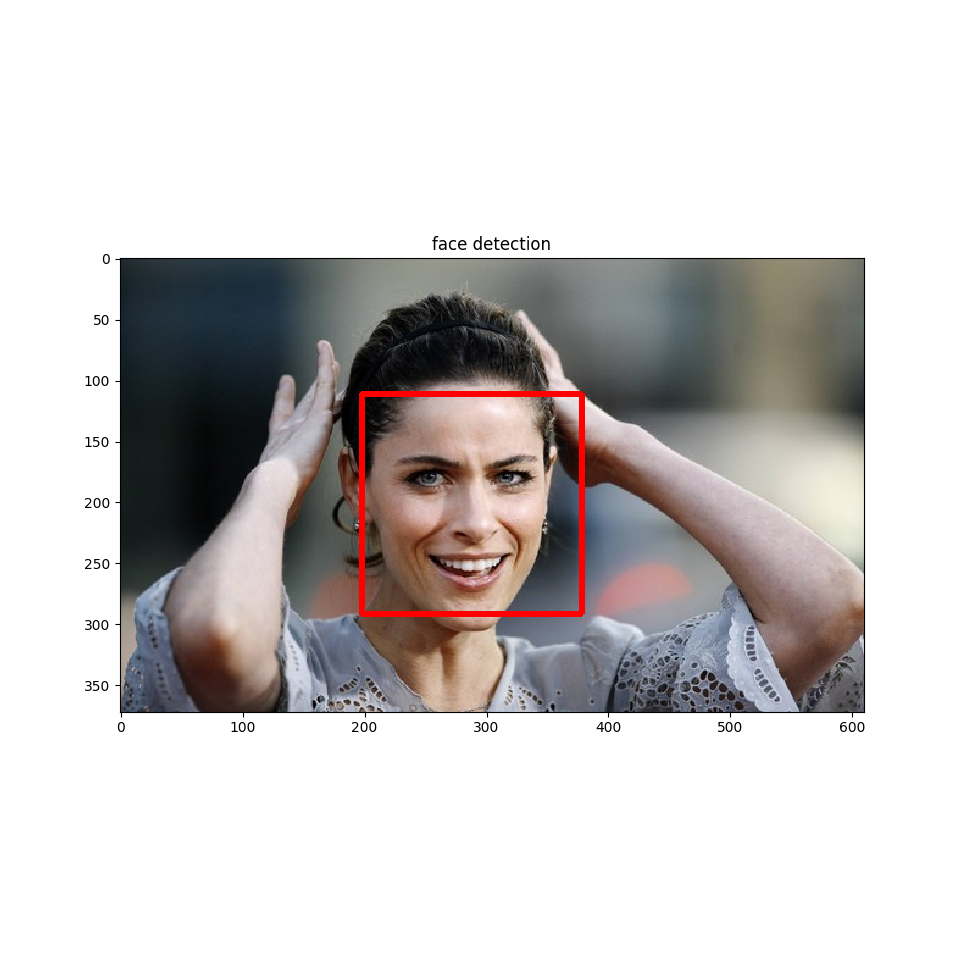

In [13]:
# 创建检测器对象
model_path = '/usr/local/Cellar/opencv/4.0.1/share/opencv4/haarcascades/haarcascade_frontalface_default.xml'
face_detector = cv2.CascadeClassifier(model_path)
# 检测人脸
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_detector.detectMultiScale(gray_img, 1.3, 5)
# 绘制人脸矩形框
paint_img = img.copy()
for (x,y,w,h) in faces:
    paint_img = cv2.rectangle(paint_img, (x,y), (x+w, y+h), (0,0,255), 3)
# 使用matplotlib可视化
plt.figure(figsize=(9.6,9.6))
plt.imshow(cv2.cvtColor(paint_img, cv2.COLOR_BGR2RGB))
plt.title('face detection')
# 保存图像到文件
plt.savefig('../output/bg63/face.png', dpi=300, bbox_inches='tight')

就这样简单的几行代码就能完成一个人脸检测任务，而且OpenCV自带人脸检测的精度还不错。这对于快速验证原型产品可行性而言是一个不错的工具。

OpenCV所提供的功能集合是非常庞大的，这里只是简要介绍了几个小的功能点。如果你是图像处理爱好者，或者计算机视觉的研究者，或者正在学习相机模型和视觉几何问题的朋友，那么使用OpenCV的python调用就是一个很好的选择。更多关于OpenCV的python调用相关的详细教程，可以阅读《OpenCV-Python Tutorial》这本书。